## Notebook for Generating Figures

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

In [79]:
def split_data(data, dim=2):
    '''Splits data into separate numpy arrays for 
       time, x, y, z (if dim=3) and theta. If dim=2,
       returns an empty numpy array for z.'''

    t = []
    x = []
    y = []
    z = []
    theta = []

    for row in data:
        t.append([row[0]])
        x.append(row[1:data.shape[1]:3])
        y.append(row[2:data.shape[1]:3])
        if dim==2:
            theta.append(row[3:data.shape[1]:3])
        else:
            z.append(row[3:data.shape[1]:3])
            theta.append(row[4:data.shape[1]:3])
            

    return np.array(t),np.array(x),np.array(y),np.array(z),theta

In [80]:
def f(theta):
    '''Helper function for converting
       theta to a color.'''
    return 0.45*(1.+np.cos(theta))

def theta_rgb(theta):
    '''Converts theta to RGB colors.'''
    rgb=[]
    for th in theta:
        rgb.append([f(th), f(th-2.*np.pi/3.), f(th+2.*np.pi/3.)])
    return np.array(rgb)

In [81]:
def plot(t,x,y,z,theta,title):
    '''Plots data in either 2D or 3D.'''

    fig,ax = plt.subplots(5,1, figsize=(5,25))

    for j in range(5):
        
        # format plot
        ax[j].set_xlabel('x', fontsize=14)
        ax[j].tick_params(axis='both', which='major', labelsize=14)
        ax[j].set_ylim([-1.5,1.5])
        ax[j].set_xlim([-1.5,1.5])
        if j==0:
            ax[j].set_title(title[0], fontsize=14)
        ax[j].set_ylabel('Snapshot at t={}\ny'.format(int(t[j])), fontsize=14)
        
        # plot data
        if len(z)==0:
            ax[j].scatter(x[j], y[j], color=theta_rgb(theta[j]))
        else:
            ax = plt.axes(ax[j],projection='3d')
            ax.scatter3D(x[j], y[j], z[j], color=theta_rgb(theta[j]))
            ax.set_zlim([-1.5,1.5])
            ax.set_zlabel('hi', fontsize=14)
#             ax[j] = ax
#             ax[j] = plt.axes(projection='3d')
#             ax[j].scatter3D(x[j], y[j], z[j], color=theta_rgb(theta[j]))
#             ax[j].set_zlim([-1.5,1.5])
#             ax[j].set_zlabel('hi', fontsize=14)

    return fig,ax

In [181]:
# load data
results = "force_test"
filepath = "/Users/elainecunha/Desktop/Spring_2021/AM_225/Project/am225_swarmilators/" + results + ".txt"
data = np.loadtxt(filepath)

In [188]:
data[::2000].shape

(5, 751)

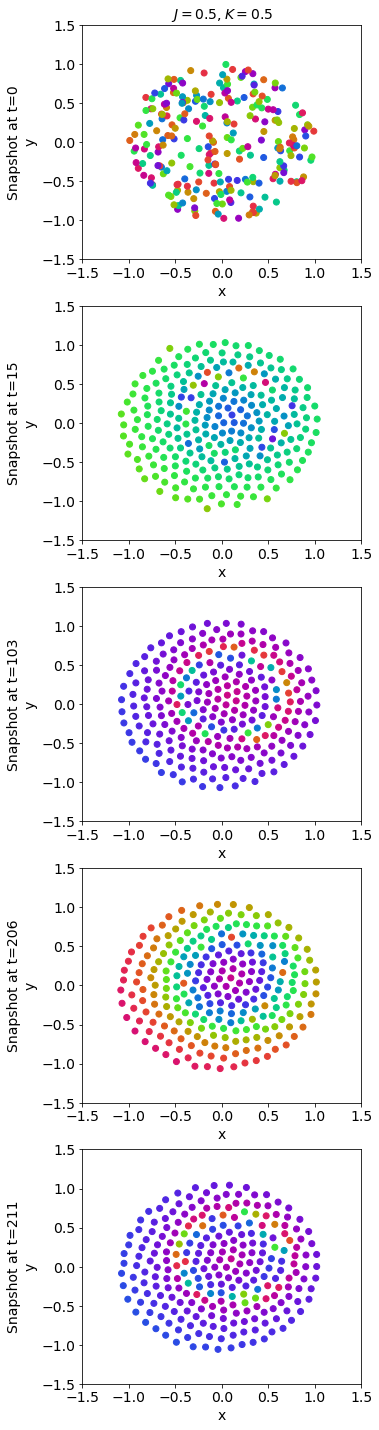

In [189]:
# process data into separate arrays
t,x,y,z,theta = split_data(data[::2000])
# z = np.copy(y)

# plot data
title = ['$J=0.5, K=0.5$']
fig,ax = plot(t,x,y,z,theta,title)
plt.show()

fig.savefig('figs/' + results + '.png')